# Exploration of Victorian Accident Data

## Introduction

This is an semi-shallow analysis of Road Vehicle accident data from Australia, Victoria.

source: https://discover.data.vic.gov.au/dataset/crash-stats-data-extract accessed 13-09-2023   

Tables

- accident (basic accident details, time, severity, location)

- person (person based details, age, sex etc)

- vehicle (vehicle based data, vehicle type, make etc)

- accident_event (sequence of events e.g. left road, rollover, caught fire)

- road_surface_cond (whether road was wet, dry, icy etc)

- atmospheric_cond (rain, winds etc)

- sub_dca (detailed codes describing accident)

- accident_node (master location table - NB subset of accident table)

- Node Table with Lat/Long references

for the purposes of this analysis, we will focus on the accident table.


### Quick Overview of the Data

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
df = pd.read_csv('data\ACCIDENT.csv')

C:\Users\oweng\AppData\Local\Temp\ipykernel_4244\2967269902.py:1: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data\ACCIDENT.csv')


In [104]:
df.shape

(203708, 28)

In [70]:
pd.set_option('display.max_columns', None)
df.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,EDITION,PAGE,GRID_REFERENCE_X,GRID_REFERENCE_Y,LIGHT_CONDITION,Light Condition Desc,NODE_ID,NO_OF_VEHICLES,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE
0,T20060000010,13/01/2006,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,40,91A,G,7,1,Day,43078,3,6,0,1,0,5,1,1,Cross intersection,3,60
1,T20060000018,13/01/2006,19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,40,91,H,8,1,Day,29720,2,4,0,1,0,3,1,2,T intersection,3,70
2,T20060000022,14/01/2006,12:10:00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,MEL,40,169,C,11,1,Day,203074,1,2,1,0,0,1,1,5,Not at intersection,2,100
3,T20060000023,14/01/2006,11:49:00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,40,88,J,8,1,Day,55462,2,2,1,0,0,1,1,2,T intersection,2,80
4,T20060000026,14/01/2006,10:45:00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,MEL,40,169,G,5,1,Day,202988,2,3,0,3,0,0,1,5,Not at intersection,3,50


In [71]:
df.tail()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,EDITION,PAGE,GRID_REFERENCE_X,GRID_REFERENCE_Y,LIGHT_CONDITION,Light Condition Desc,NODE_ID,NO_OF_VEHICLES,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE
203703,T20200019239,1/11/2020,12:11:00,1,Collision with vehicle,0,Sunday,142,LEAVING PARKING,MEL,46,44,B,12,1,Day,665835,2,4,1,0,0,3,1,5,Not at intersection,2,50
203704,T20200019247,1/11/2020,15:30:00,4,Collision with a fixed object,1,Sunday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,MEL,46,468,A,9,1,Day,665912,1,2,2,0,0,0,1,5,Not at intersection,2,999
203705,T20200019250,1/11/2020,18:00:00,1,Collision with vehicle,0,Sunday,116,LEFT NEAR (INTERSECTIONS ONLY),MEL,40,10,D,1,1,Day,226603,2,2,1,0,0,1,1,1,Cross intersection,2,60
203706,T20200019253,1/11/2020,12:00:00,6,Vehicle overturned (no collision),1,Sunday,180,OFF CARRIAGEWAY ON RIGHT BEND,VCD,9,50,J,9,1,Day,665836,1,1,1,0,0,0,1,5,Not at intersection,2,80
203707,T20200019417,4/11/2020,01:30:00,4,Collision with a fixed object,3,Wednesday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,MEL,46,88,F,8,3,Dark Street lights on,666096,1,1,1,0,0,0,1,5,Not at intersection,2,80


In [72]:
def check_missing(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            print(col, df[col].isnull().sum())
            
check_missing(df)

DIRECTORY 2348
EDITION 2348
PAGE 2348
GRID_REFERENCE_X 2348
GRID_REFERENCE_Y 2348


In [73]:
def check_dtypes(df):
    for col in df.columns:
        print(col, df[col].dtype)
        
check_dtypes(df)

ACCIDENT_NO object
ACCIDENTDATE object
ACCIDENTTIME object
ACCIDENT_TYPE int64
Accident Type Desc object
DAY_OF_WEEK int64
Day Week Description object
DCA_CODE int64
DCA Description object
DIRECTORY object
EDITION object
PAGE object
GRID_REFERENCE_X object
GRID_REFERENCE_Y object
LIGHT_CONDITION int64
Light Condition Desc object
NODE_ID int64
NO_OF_VEHICLES int64
NO_PERSONS int64
NO_PERSONS_INJ_2 int64
NO_PERSONS_INJ_3 int64
NO_PERSONS_KILLED int64
NO_PERSONS_NOT_INJ int64
POLICE_ATTEND int64
ROAD_GEOMETRY int64
Road Geometry Desc object
SEVERITY int64
SPEED_ZONE int64


In [74]:
df['SEVERITY'].value_counts()

3    131561
2     68436
1      3707
4         4
Name: SEVERITY, dtype: int64

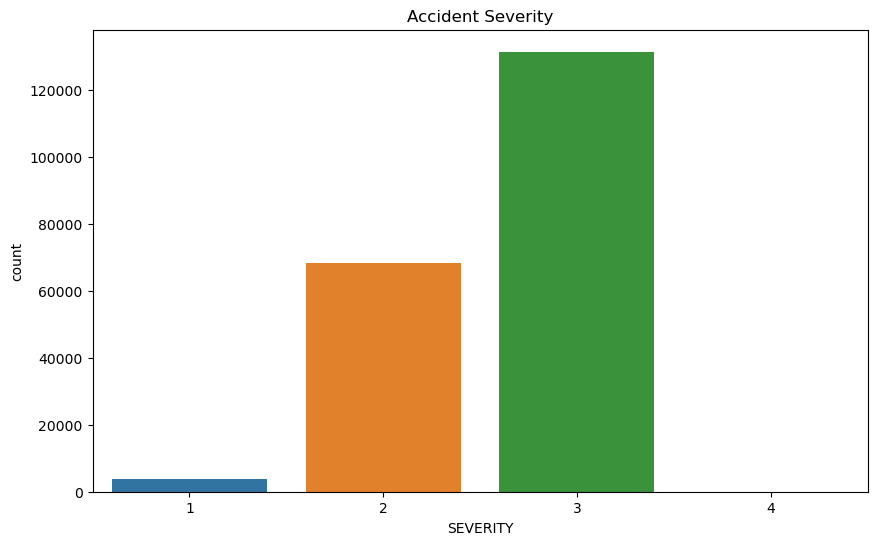

In [75]:
def plot_col(col, title):
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, data=df)
    plt.title(title)
    plt.show()

plot_col('SEVERITY', 'Accident Severity')

### Analysis of Severity

* We will be looking at the Severity of an accident againest all our other features to determine which features are most likely to cause a severe accident.

<Axes: xlabel='Day Week Description'>

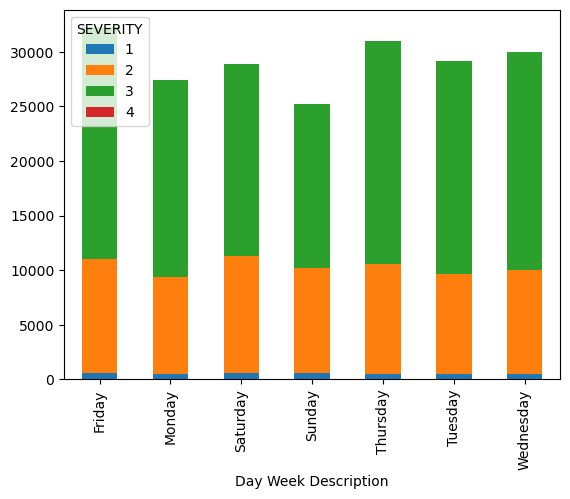

In [76]:
# Example with the 'Day Week Description' feature
pd.crosstab(df['Day Week Description'], df['SEVERITY']).plot(kind='bar', stacked=True)


In [77]:
df.groupby('SEVERITY')['NO_OF_VEHICLES'].mean()

SEVERITY
1    1.574049
2    1.695438
3    1.849933
4    1.250000
Name: NO_OF_VEHICLES, dtype: float64

In [78]:
crosstab_result = pd.crosstab(df['Accident Type Desc'], df['SEVERITY'])


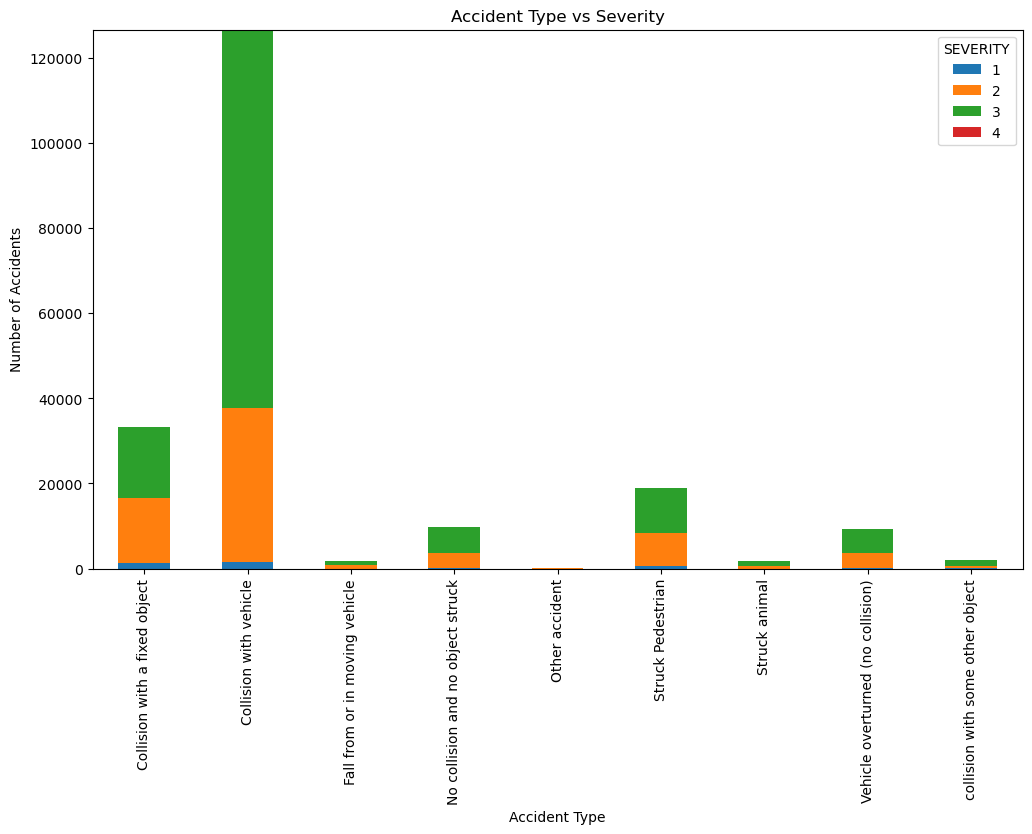

In [79]:
# Stacked bar chart
crosstab_result.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Accident Type vs Severity')
plt.ylabel('Number of Accidents')
plt.xlabel('Accident Type')
plt.show()

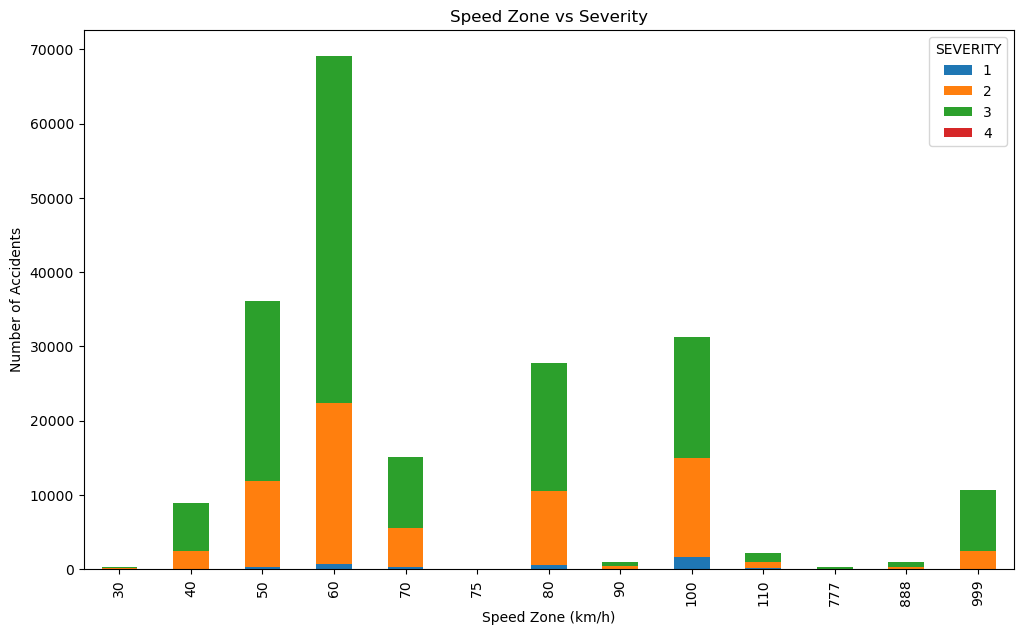

In [80]:
crosstab_speed_severity = pd.crosstab(df['SPEED_ZONE'], df['SEVERITY'])

crosstab_speed_severity.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Speed Zone vs Severity')
plt.ylabel('Number of Accidents')
plt.xlabel('Speed Zone (km/h)')
plt.show()

### Data Preprocessing 

#### Missing Values

In [81]:
check_missing(df)

DIRECTORY 2348
EDITION 2348
PAGE 2348
GRID_REFERENCE_X 2348
GRID_REFERENCE_Y 2348


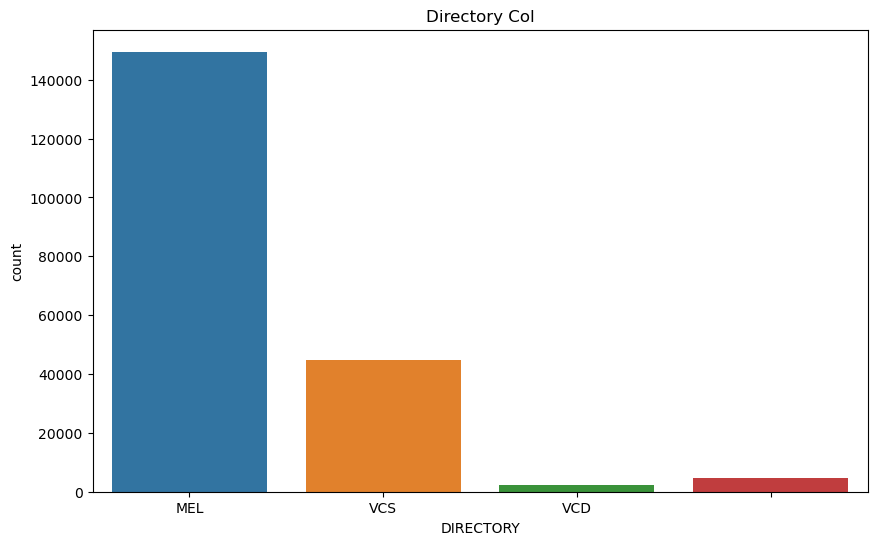

In [82]:
plot_col('DIRECTORY', 'Directory Col')

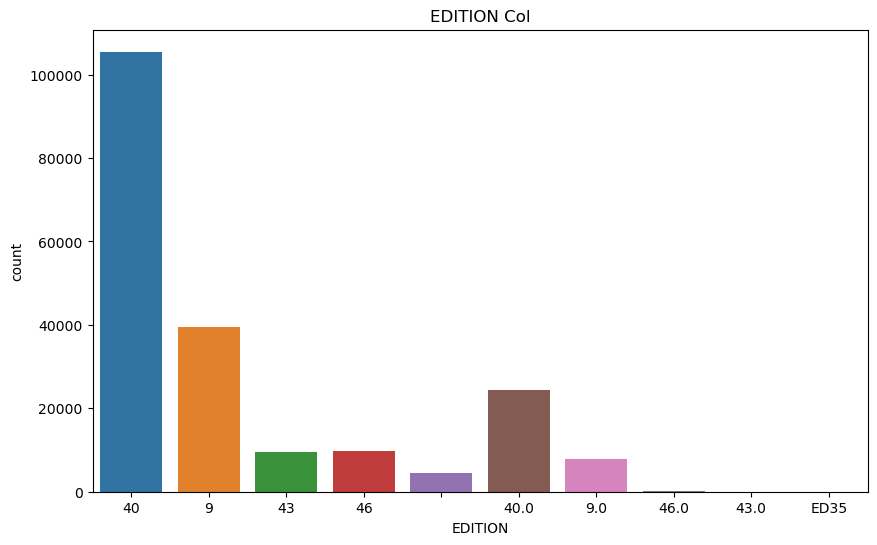

In [83]:
plot_col('EDITION', 'EDITION Col')

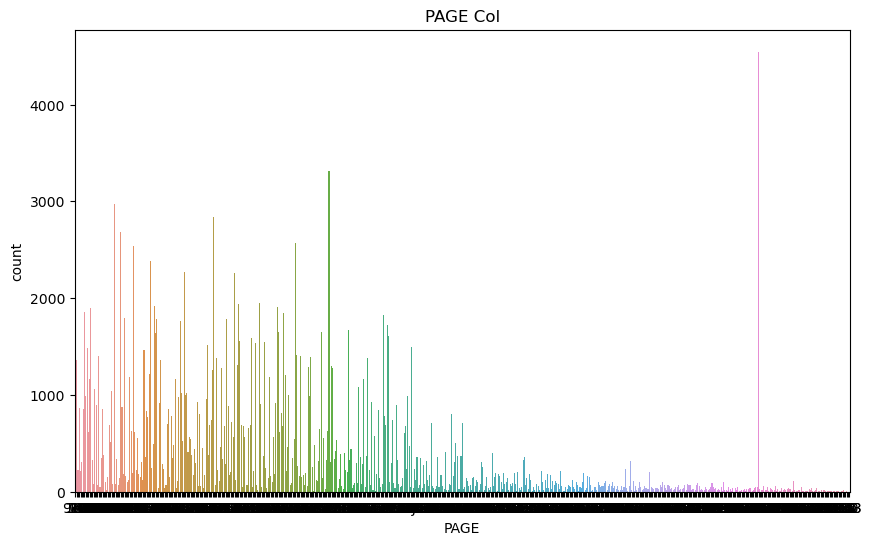

In [84]:
plot_col('PAGE', 'PAGE Col')

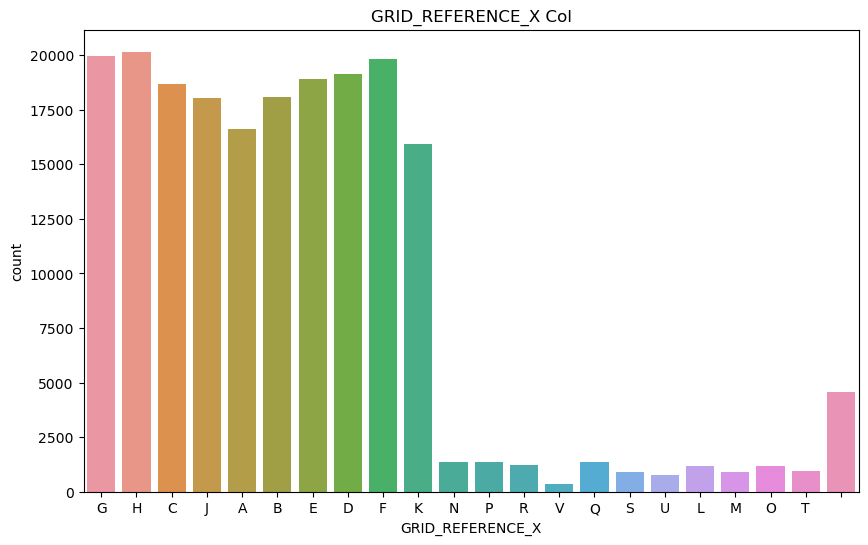

In [85]:
plot_col('GRID_REFERENCE_X', 'GRID_REFERENCE_X Col')

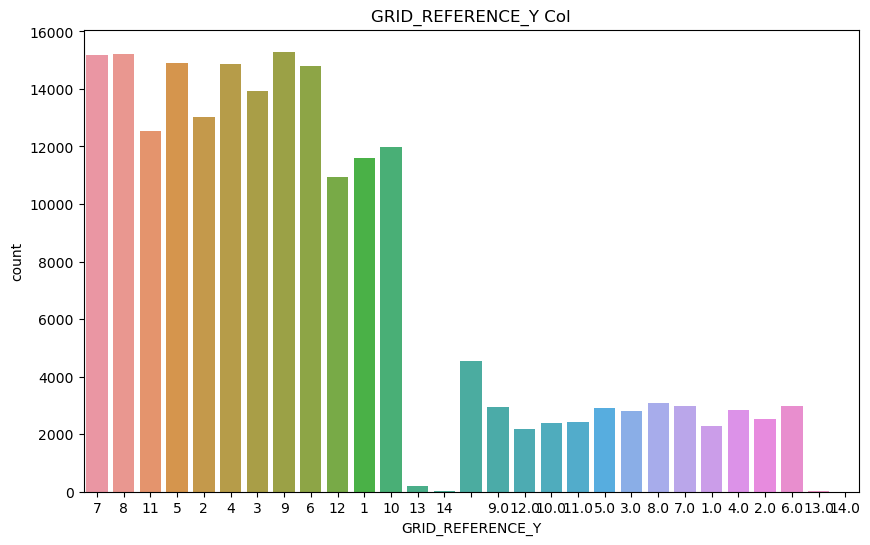

In [86]:
plot_col('GRID_REFERENCE_Y', 'GRID_REFERENCE_Y Col')

In [87]:
import pandas as pd

def describe_numerical(df, col_name):
    if col_name not in df.columns:
        print(f"Column '{col_name}' not found in the DataFrame.")
        return

    if not pd.api.types.is_numeric_dtype(df[col_name]):
        print(f"Column '{col_name}' is not numerical.")
        return

    # Compute statistics
    mean = df[col_name].mean()
    median = df[col_name].median()
    std_dev = df[col_name].std()
    min_val = df[col_name].min()
    max_val = df[col_name].max()
    q25 = df[col_name].quantile(0.25)
    q75 = df[col_name].quantile(0.75)
    iqr = q75 - q25

    # Print statistics
    print(f"Statistics for '{col_name}':")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Min: {min_val}")
    print(f"Max: {max_val}")
    print(f"25th Percentile (Q1): {q25}")
    print(f"75th Percentile (Q3): {q75}")
    print(f"Interquartile Range (IQR): {iqr}")

# Example usage:
# describe_numerical(df, "NO_OF_VEHICLES")


In [88]:
describe_numerical(df, 'PAGE')

Column 'PAGE' is not numerical.


In [89]:
def unique_values(col):
    print(f"Unique values for column '{col}':")
    print(df[col].unique()) 

In [90]:
unique_values('PAGE')

Unique values for column 'PAGE':
['91A' '91' '169' '88' '146' '704' '103' '90' '99' '89' '133' '110' '97'
 '207' '151' '100' '98' '689' '50' '193' '699' '102' '696' '484' '687'
 '713' '2M' '95' '20' nan '212' '59' '712' '700' '718' '127' '96' '35'
 '160' '17' '140' '694' '138' '19' '100A' '168' '80' '111' '106' '82'
 '107' '706' '693' '344' '79' '170' '53' '42' '1A' '2B' '132' '130' '68'
 '1B' '47' '243' '2S' '60' '108' '128' '211' '933' '205' '451' '686' '441'
 '83' '101' '25' '698' '518' '401' '26' '27' '336' '77' '33' '93' '145'
 '317' '1C' '104' '94' '39' '431' '2E' '153' '206' '263' '131' '163' '561'
 '2H' '2P' '453' '565' '14' '76' '30' '149' '2G' '22' '468' '54' '40' '23'
 '21' '688' '61' '13' '158' '360' '3' '432' '69' '435' '7' '67' '566' '84'
 '488' '55' '65' '493' '702' '129' '202' '58' '142' '208' '41' '190' '259'
 '32' '92' '320' '358' '16' '613' '682' '444' '2A' '136' '709' '465' '214'
 '73' '2C' '48' '74' '86' '56' '2L' '87' '333' '11' '2K' '271' '270' '337'
 '203' '45' 

In [91]:
def impute_unknown(df, cols):
    """
    Impute missing values in the specified columns with 'Unknown'.
    
    Parameters:
    - df: DataFrame
    - cols: List of column names to be imputed
    
    Returns:
    DataFrame with missing values in specified columns replaced by 'Unknown'
    """

    for col in cols:
        if col in df.columns:
            df[col].fillna('Unknown', inplace=True)
        else:
            print(f"Column '{col}' not found in the DataFrame.")
            
    return df

# List of columns with missing values
missing_cols = ['DIRECTORY', 'EDITION', 'PAGE', 'GRID_REFERENCE_X', 'GRID_REFERENCE_Y']  


# Impute the DataFrame
df = impute_unknown(df, missing_cols)


In [92]:
check_missing(df)

In [93]:
def check_nan(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            print(col, df[col].isnull().sum())

In [94]:
check_nan(df)

In [95]:
def label_encode_df(df):
    """
    Label encode object type columns in the DataFrame.
    
    Parameters:
    - df: DataFrame
    
    Returns:
    DataFrame with object columns label encoded
    """
    le = LabelEncoder()
    
    object_cols = df.select_dtypes(include='object').columns
    
    for col in object_cols:
        df[col] = df[col].astype(str)  # Convert column to string type
        df[col] = le.fit_transform(df[col])

    return df

# Label encode the DataFrame
df = label_encode_df(df)


In [96]:
df.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,EDITION,PAGE,GRID_REFERENCE_X,GRID_REFERENCE_Y,LIGHT_CONDITION,Light Condition Desc,NODE_ID,NO_OF_VEHICLES,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE
0,0,713,762,1,1,6,0,113,58,1,1,588,7,23,1,4,43078,3,6,0,1,0,5,1,1,0,3,60
1,1,713,1150,1,1,6,0,113,58,1,1,587,8,25,1,4,29720,2,4,0,1,0,3,1,2,6,3,70
2,2,891,730,7,2,7,2,190,7,1,1,73,3,5,1,4,203074,1,2,1,0,0,1,1,5,3,2,100
3,3,891,709,1,1,7,2,130,54,1,1,583,9,25,1,4,55462,2,2,1,0,0,1,1,2,6,2,80
4,4,891,645,1,1,7,2,121,61,1,1,73,7,19,1,4,202988,2,3,0,3,0,0,1,5,3,3,50


In [97]:
from sklearn.model_selection import train_test_split

X = df.drop('SEVERITY', axis=1)
y = df['SEVERITY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [99]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [100]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9088409994600167

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       752
           2       0.87      0.86      0.86     13742
           3       0.93      0.93      0.93     26247
           4       0.00      0.00      0.00         1

    accuracy                           0.91     40742
   macro avg       0.70      0.70      0.70     40742
weighted avg       0.91      0.91      0.91     40742



c:\Users\oweng\miniconda3\envs\rmit_ml\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oweng\miniconda3\envs\rmit_ml\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oweng\miniconda3\envs\rmit_ml\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
# Assuming clf is your trained RandomForestClassifier
feature_importances = clf.feature_importances_

# Create a DataFrame for the importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df)


                 Feature  Importance
19      NO_PERSONS_INJ_2    0.351582
20      NO_PERSONS_INJ_3    0.221168
21     NO_PERSONS_KILLED    0.050753
0            ACCIDENT_NO    0.049325
16               NODE_ID    0.038642
1           ACCIDENTDATE    0.033294
2           ACCIDENTTIME    0.032022
11                  PAGE    0.029886
13      GRID_REFERENCE_Y    0.020771
12      GRID_REFERENCE_X    0.019483
23         POLICE_ATTEND    0.016581
7               DCA_CODE    0.016041
8        DCA Description    0.015078
5            DAY_OF_WEEK    0.013030
26            SPEED_ZONE    0.012969
6   Day Week Description    0.012504
22    NO_PERSONS_NOT_INJ    0.012271
18            NO_PERSONS    0.009655
17        NO_OF_VEHICLES    0.006512
3          ACCIDENT_TYPE    0.005670
25    Road Geometry Desc    0.005553
15  Light Condition Desc    0.005522
24         ROAD_GEOMETRY    0.005304
10               EDITION    0.005238
14       LIGHT_CONDITION    0.005139
4     Accident Type Desc    0.003947
9

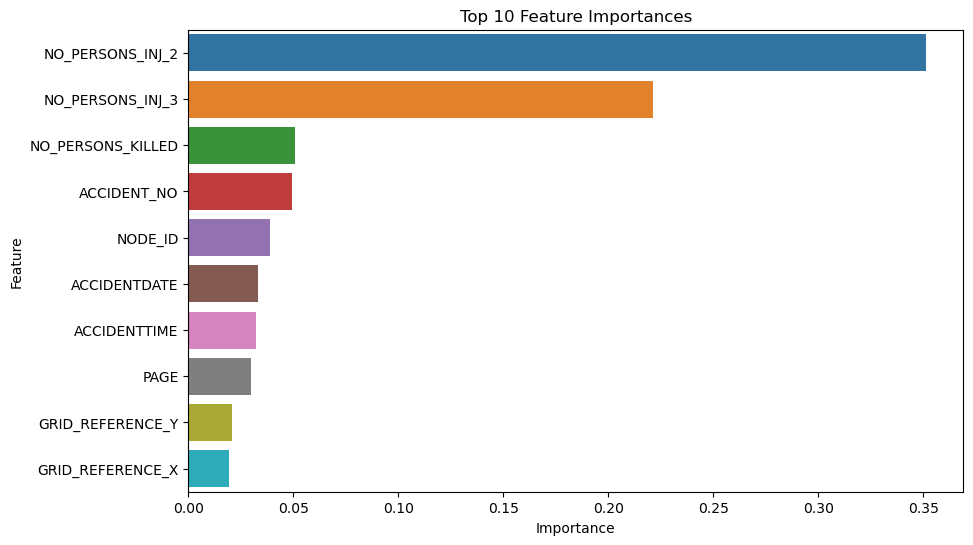

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top N features
N = 10  # You can change this value to see more or fewer features
top_features = features_df.iloc[:N]

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top {} Feature Importances'.format(N))
plt.show()
